In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import keras
from keras import backend as K  
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow import one_hot
from tensorflow.keras.applications import xception
from tensorflow.keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output
import gc

In [ ]:
base_dir = '/content/drive/MyDrive/Harper/3-C7082/Assignment/C7082-assignment/first-data'

train_data_dir = os.path.join(base_dir, 'train')
test_data_dir = os.path.join(base_dir, 'test')


In [6]:
CATEGORIES = os.listdir("/content/drive/MyDrive/Harper/3-C7082/Assignment/C7082-assignment/first-data/train")
CATEGORIES

['cwd',
 'fhn',
 'mze',
 'sbt',
 'smw',
 'wht',
 'chk',
 'cbl',
 'cls',
 'lsb',
 'bgs',
 'shp']

In [8]:
pretrained = xception.Xception(input_shape=[240,240, 3], include_top=False)

In [9]:
pretrained.trainable = False

In [10]:
model = tf.keras.Sequential([
    pretrained,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(trainable = True,axis=1),
    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.BatchNormalization(trainable = True,axis=1),
    
    tf.keras.layers.Dense(12,activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               204900    
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                2

In [12]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.4,1],
    rescale=1.0/255.0)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
pathh = "/content/drive/MyDrive/Harper/3-C7082/Assignment/C7082-assignment/first-data/train"

In [15]:
result = model.fit(train_datagen.flow_from_directory(pathh,
                                        target_size=(240, 240), 
                                        color_mode='rgb', 
                                        class_mode='categorical', 
                                        batch_size=50, 
                                        shuffle=True),
                    epochs=6,
                    verbose=1)

Found 300 images belonging to 12 classes.
Epoch 1/6
6/6 [==============================] - 62s 9s/step - loss: 3.0121 - accuracy: 0.0880
Epoch 2/6
6/6 [==============================] - 7s 1s/step - loss: 2.4332 - accuracy: 0.2002
Epoch 3/6
6/6 [==============================] - 7s 1s/step - loss: 2.3633 - accuracy: 0.2575
Epoch 4/6
6/6 [==============================] - 7s 1s/step - loss: 2.0522 - accuracy: 0.2621
Epoch 5/6
6/6 [==============================] - 7s 1s/step - loss: 1.8887 - accuracy: 0.3825
Epoch 6/6
6/6 [==============================] - 7s 1s/step - loss: 1.8806 - accuracy: 0.3647


In [16]:
result.history.keys()

dict_keys(['loss', 'accuracy'])

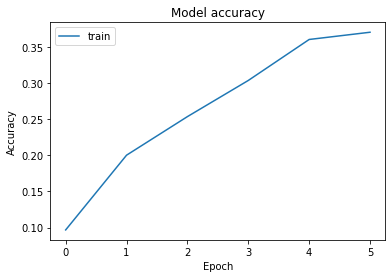

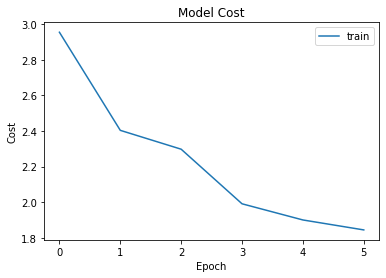

In [17]:
plt.plot(result.history['accuracy'], label='train')
# plt.plot(result.history['val_accuracy'], label='valid')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(result.history['loss'], label='train')
# plt.plot(result.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [18]:
pretrained.trainable = True
model.get_layer('xception').trainable

True

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               204900    
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                2

In [20]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0006),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
result = model.fit(train_datagen.flow_from_directory(pathh,
                                        target_size=(240, 240), 
                                        color_mode='rgb', 
                                        class_mode='categorical', 
                                        batch_size=50, 
                                        shuffle=True),
                    epochs=6,
                    verbose=1)

Found 300 images belonging to 12 classes.
Epoch 1/6
6/6 [==============================] - 22s 1s/step - loss: 2.1197 - accuracy: 0.3028
Epoch 2/6
6/6 [==============================] - 10s 2s/step - loss: 1.3745 - accuracy: 0.5652
Epoch 3/6
6/6 [==============================] - 10s 2s/step - loss: 1.0174 - accuracy: 0.7160
Epoch 4/6
6/6 [==============================] - 10s 2s/step - loss: 0.7760 - accuracy: 0.8123
Epoch 5/6
6/6 [==============================] - 10s 2s/step - loss: 0.5566 - accuracy: 0.8912
Epoch 6/6
6/6 [==============================] - 10s 2s/step - loss: 0.4459 - accuracy: 0.9141


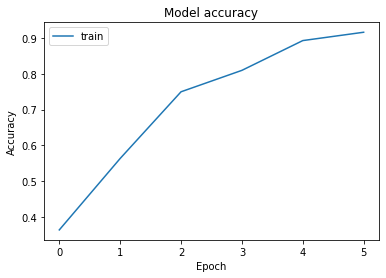

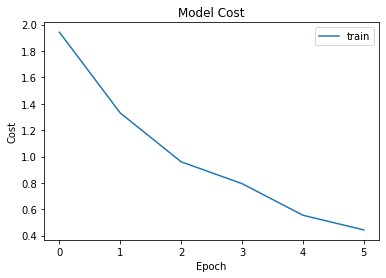

In [23]:
plt.plot(result.history['accuracy'], label='train')
# plt.plot(result.history['val_accuracy'], label='valid')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(result.history['loss'], label='train')
# plt.plot(result.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [24]:
gc.collect()

5244

In [25]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.000006),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [26]:
result = model.fit(train_datagen.flow_from_directory(pathh,
                                        target_size=(240, 240), 
                                        color_mode='rgb', 
                                        class_mode='categorical', 
                                        batch_size=30, 
                                        shuffle=True),
                    epochs=10,
                    initial_epoch=5,
                    verbose=1)

Found 300 images belonging to 12 classes.
Epoch 6/10
10/10 [==============================] - 23s 911ms/step - loss: 0.3802 - accuracy: 0.9194
Epoch 7/10
10/10 [==============================] - 10s 940ms/step - loss: 0.4212 - accuracy: 0.9164
Epoch 8/10
10/10 [==============================] - 10s 943ms/step - loss: 0.4278 - accuracy: 0.9086
Epoch 9/10
10/10 [==============================] - 10s 958ms/step - loss: 0.3968 - accuracy: 0.9544
Epoch 10/10
10/10 [==============================] - 10s 960ms/step - loss: 0.4275 - accuracy: 0.8929


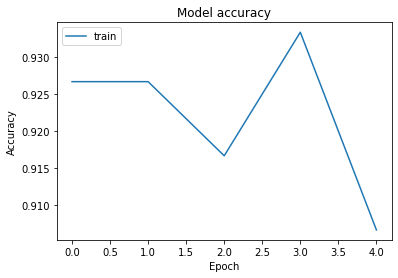

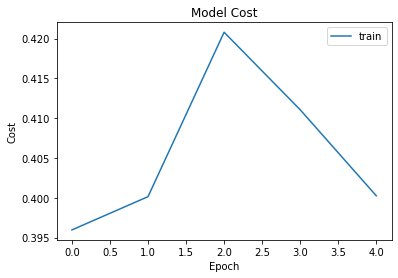

In [27]:
plt.plot(result.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(result.history['loss'], label='train')
# plt.plot(result.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [28]:
gc.collect()

5364

In [29]:

valid = model.evaluate(test_datagen.flow_from_directory(pathh,
                                                        target_size=(240, 240), 
                                                        color_mode='rgb',
                                                        class_mode='categorical',))

Found 300 images belonging to 12 classes.
10/10 [==============================] - 5s 362ms/step - loss: 0.5704 - accuracy: 0.9400


In [30]:
a = test_datagen.flow_from_directory(pathh,
                                    target_size=(240, 240), 
                                    color_mode='rgb',
                                    class_mode='categorical',
                                    batch_size=1)

Found 300 images belonging to 12 classes.


In [31]:
CATEGORIES = list(a.class_indices.keys())

In [32]:
R_categories = {y:x for x,y in a.class_indices.items()}
R_categories

{0: 'bgs',
 1: 'cbl',
 2: 'chk',
 3: 'cls',
 4: 'cwd',
 5: 'fhn',
 6: 'lsb',
 7: 'mze',
 8: 'sbt',
 9: 'shp',
 10: 'smw',
 11: 'wht'}

In [33]:
del valid
gc.collect()

4

----------

In [ ]:
img_width, img_height = 150, 150

size = (150, 150)

train_data_dir = train_data_dir.map(lambda x, y: (tf.image.resize(x, size), y))
validation_data_dir = validation_data_dir.map(lambda x, y: (tf.image.resize(x, size), y))
test_data_dir = test_data_dir.map(lambda x, y: (tf.image.resize(x, size), y))

AttributeError: ignored

In [ ]:

epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu',
                        input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3),
                        activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

In [ ]:
train_features, train_labels = extract_features(train_dir, 4939)
validation_features, validation_labels = extract_features(validation_dir, 300)
test_features, test_labels = extract_features(test_dir, 300)

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

NameError: ignored

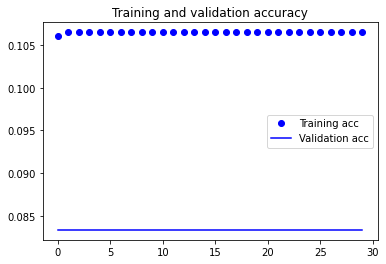

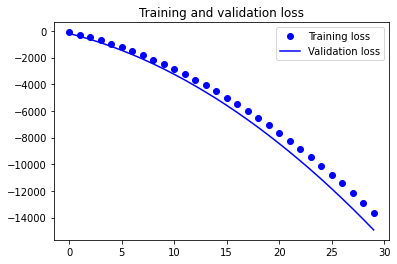

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()